<center><h1>Exploring the Competitors</h1></center>

### Part 1. Get location data using Foursquare

[Foursquare Places API](https://location.foursquare.com/products/places-api/) is very usefule online application used by many developers & other application like Uber etc. In this project you can used it to retrieve informtion about the places present in the neighborhoods of Toronto. The API returns a JSON file and we need to turn that into a data-frame. Here I’ve chosen similar businesses(pet grooming) for each neighborhood within a radius of 2.5km.

You will need to create an account with Foursquare to access the API.  It is free to sign up, and you get $200 free credit.



In [1]:
import requests
import pandas as pd

In [2]:
toronto_DF = pd.read_csv('Toronto_Neighborhoods.csv')

In [3]:
display(toronto_DF)

,Borough,Postalcode,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,North Toronto West,43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160
...,...,...,...,...,...
98,York,M6C,Humewood-Cedarvale,43.693781,-79.428191
99,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512
100,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
101,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262


In [4]:
# Set up your API key and other constants for Foursquare API
API_KEY = 'fsq3cedvIe0HUKfjkoGyFfy91tLazFORcs6XfxpOCTCGx1k='  # Replace with your actual Foursquare API key
LIMIT = 20  # Maximum number of venues to return
radius = 2500  # Search radius in meters

# Function to get nearby venues
def getNearbyVenues(names, postalcode, latitudes, longitudes, radius):
    venues_list = []

    for name, postalcode, lat, lng in zip(names, postalcode, latitudes, longitudes):
        print(f"Processing neighborhood: {name}")

        # Skip if latitude or longitude is missing
        if pd.isnull(lat) or pd.isnull(lng):
            print(f"Skipping {name} due to missing latitude or longitude.")
            continue

        # Create the API request URL and parameters
        url = 'https://api.foursquare.com/v3/places/search'
        params = {
            'll': f'{lat},{lng}',
            'radius': radius,
            'limit': LIMIT,
            'categories': 11095  # Pest control services category ID: search foursquare categories documentations
        }

        # Set up headers with the API key
        headers = {
            "Accept": "application/json",
            "Authorization": API_KEY  
        }

        # Make the GET request
        response = requests.get(url, headers=headers, params=params)

        # Check if the request was successful
        if response.status_code != 200:
            print(f"Failed to get data for {name}. Status code: {response.status_code}")
            print(f"Error message: {response.text}")
            continue

        results = response.json()

        # Parse the JSON response
        for venue in results.get('results', []):
            venue_name = venue.get('name')
            venue_id = venue.get('fsq_id')
            venue_location = venue.get('geocodes', {}).get('main', {})
            venue_lat = venue_location.get('latitude')
            venue_lng = venue_location.get('longitude')
            venue_categories = venue.get('categories', [])
            venue_category = venue_categories[0]['name'] if venue_categories else 'Unknown'

            # Append to the list
            venues_list.append([
                name,
                postalcode,
                lat,
                lng,
                venue_name,
                venue_id,
                venue_lat,
                venue_lng,
                venue_category
            ])

    # Create a DataFrame from the list
    nearby_venues = pd.DataFrame(venues_list, columns=[
        'Neighbourhood',
        'Postalcode',
        'Neighbourhood Latitude',
        'Neighbourhood Longitude',
        'Venue',
        'fsq_id',
        'Venue Latitude',
        'Venue Longitude',
        'Venue Category'
    ])

    return nearby_venues

# Example usage: Replace with the path to your Toronto Neighborhood CSV file
# Ensure 'toronto_DF' has the columns 'Neighbourhood', 'Postalcode', 'Latitude', and 'Longitude'
toronto_venues = getNearbyVenues(
    names=toronto_DF['Neighbourhood'],
    postalcode=toronto_DF['Postalcode'],
    latitudes=toronto_DF['Latitude'],
    longitudes=toronto_DF['Longitude'],
    radius=radius
)

# Display the first few rows of the resulting DataFrame
toronto_venues.head()

Processing neighborhood: Lawrence Park
Processing neighborhood: Davisville North
Processing neighborhood: North Toronto West
Processing neighborhood: Davisville
Processing neighborhood: Moore Park, Summerhill East
Processing neighborhood: Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Processing neighborhood: Roselawn
Processing neighborhood: Forest Hill North & West
Processing neighborhood: The Annex, North Midtown, Yorkville
Processing neighborhood: Rosedale
Processing neighborhood: St. James Town, Cabbagetown
Processing neighborhood: Church and Wellesley
Processing neighborhood: Regent Park, Harbourfront
Processing neighborhood: Garden District, Ryerson
Processing neighborhood: St. James Town
Processing neighborhood: Berczy Park
Processing neighborhood: Central Bay Street
Processing neighborhood: Richmond, Adelaide, King
Processing neighborhood: Harbourfront East, Union Station, Toronto Islands
Processing neighborhood: Toronto Dominion Centre, Design Exchange
Proc

,Neighbourhood,Postalcode,Neighbourhood Latitude,Neighbourhood Longitude,Venue,fsq_id,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,M4N,43.728020,-79.388790,Cain Pest & Wildlife Control,59bb5950112c6c44205c90af,43.728194,-79.402771,Pest Control Service
1,Lawrence Park,M4N,43.728020,-79.388790,AAA Professional Wildlife Control,049ad9a78fbc4226a4e3142d,43.710908,-79.393269,Pest Control Service
2,Lawrence Park,M4N,43.728020,-79.388790,Pest and Animal Control Toronto,52851516498ea2013e423f0b,43.711267,-79.396837,Pest Control Service
3,Lawrence Park,M4N,43.728020,-79.388790,AAA Affordable Wildlife Control,274729bde84d49dc9148401e,43.712275,-79.396109,Pest Control Service
4,Davisville North,M4P,43.712751,-79.390197,AAA Professional Wildlife Control,049ad9a78fbc4226a4e3142d,43.710908,-79.393269,Pest Control Service


In [5]:
# The total number of pest control services in Toronto
toronto_venues['Venue'].nunique()

137

In [6]:
# Oberserving the number of competitors in each neighbourhood
venue_counts = toronto_venues.groupby('Neighbourhood')['Venue'].count()
venue_counts

Neighbourhood
Agincourt                                           4
Bathurst Manor, Wilson Heights, Downsview North     2
Bayview Village                                     4
Bedford Park, Lawrence Manor East                   3
Berczy Park                                        17
                                                   ..
Willowdale) West                                    3
Willowdale, Newtonbrook                             5
Woodbine Heights                                   12
York Mills West                                     6
York Mills, Silver Hills                            4
Name: Venue, Length: 98, dtype: int64

In [8]:
# lowest competition neighbourhoods
lowest_comp = venue_counts.sort_values().head(25).reset_index()
lowest_comp.columns = ['Neighbourhood', 'Venue Count']
display(lowest_comp)

,Neighbourhood,Venue Count
0,Cedarbrae,1
1,"Humberlea, Emery",1
2,"Clarks Corners, Tam O'Shanter, Sullivan",1
3,"Clairville, Humberwood, Woodbine Downs, West H...",1
4,"The Kingsway, Montgomery Road, Old Mill North",1
5,Don Mills) South (Flemingdon Park,1
6,Downsview) Central,1
7,"Runnymede, Swansea",1
8,"Rouge Hill, Port Union, Highland Creek",1
9,"Mimico NW, The Queensway West, South of Bloor,...",1


### Part 2. Interactive leaflet map using coordinate data.


In [9]:
import folium # map rendering library
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [13]:
#Create map of all pest control services in Toronto
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 12)
# Add markers to map
for lat, lng, name, category, postcode in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Venue'], toronto_venues['Venue Category'], toronto_venues['Postalcode']):
    label = '{}, {} - {}'.format(name, category, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
display(map_toronto)

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [12]:
# Pest control services in specific neighbourhood
target = 'Parkwoods'

search_area = toronto_venues[toronto_venues['Neighbourhood'] == target]
latitude = toronto_DF[toronto_DF['Neighbourhood'] == target]['Latitude']
longitude = toronto_DF[toronto_DF['Neighbourhood'] == target]['Longitude']
display(search_area)
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, venue, neighborhood in zip(search_area['Venue Latitude'], search_area['Venue Longitude'], search_area['Venue'], search_area['Neighbourhood']):
    label = '{},{}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)

map_toronto

,Neighbourhood,Postalcode,Neighbourhood Latitude,Neighbourhood Longitude,Venue,fsq_id,Venue Latitude,Venue Longitude,Venue Category
514,Parkwoods,M3A,43.753259,-79.329656,Delta Pest Control Ltd,9111b24255854a576f2979a4,43.752303,-79.310905,Pest Control Service
515,Parkwoods,M3A,43.753259,-79.329656,Raja Pest Control Services Inc,c2e2ed8e0cc141f82562cab1,43.742398,-79.306439,Pest Control Service
516,Parkwoods,M3A,43.753259,-79.329656,Precise Property Inspections,68f82df8da904059e35cd1e7,43.752874,-79.358362,Home Inspection
517,Parkwoods,M3A,43.753259,-79.329656,Contact Pest Control Inc,b7929f3c717b4f570c7c90f7,43.750701,-79.300346,Pest Control Service
518,Parkwoods,M3A,43.753259,-79.329656,Truly Nolen Pest Control Toronto,b289bac9e80240924da680eb,43.754911,-79.351938,Pest Control Service


/opt/conda/lib/python3.11/site-packages/folium/utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/opt/conda/lib/python3.11/site-packages/folium/utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/opt/conda/lib/python3.11/site-packages/folium/utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


### Part 3. Customer Reviews
It seems like there is one one pet groomer withing 2km of Scarborough Village, I am interested in seeing customer's comments on Funny Bunny.  I can use [Foursquare's Place Tips API.](https://docs.foursquare.com/developer/reference/place-tips)


In [14]:
# a function to loop through the list of pest control services in the neighborhood and compile all the comments related to them
def getTips(venues, fsq_ids):
    venues_tips = []

    for venue, fsq_id in zip(venues, fsq_ids):
        print(f"Processing venue: {venue}")


        # Create the API request URL and parameters
        url = f"https://api.foursquare.com/v3/places/{fsq_id}/tips"


        # Make the GET request
        headers = {
            "Accept": "application/json",
            "Authorization": API_KEY  
        }
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code != 200:
            print(f"Failed to get data for {venue}. Status code: {response.status_code}")
            print(f"Error message: {response.text}")
            continue

        results = response.json()
        
        # Parse the JSON response
        for tip in results:
            # Extract venue information
            tip_id = tip.get('id')
            tip_created = tip.get('created_at')
            tip_text = tip.get('text')
   

            # Append to the list
            venues_tips.append([
                venues,
                tip_id,
                tip_created,
                tip_text
            ])
            
    
    # Create a DataFrame from the list
    nearby_tips = pd.DataFrame(venues_tips, columns=[
        'venue_name',
        'id',
        'created_at',
        'text'
    ])

    return nearby_tips


nearby_tips = getTips(
    venues=search_area['Venue'],
    fsq_ids=search_area['fsq_id']
)

# Display the first few rows of the resulting DataFrame
nearby_tips.head()

Processing venue: Delta Pest Control Ltd
Processing venue: Raja Pest Control Services Inc
Processing venue: Precise Property Inspections
Processing venue: Contact Pest Control Inc
Processing venue: Truly Nolen Pest Control Toronto
Failed to get data for Truly Nolen Pest Control Toronto. Status code: 404
Error message: invalid place specified: b289bac9e80240924da680eb


,venue_name,id,created_at,text


In [15]:
# Function to get place details
def get_place_details(fsq_id):
    url = f"https://api.foursquare.com/v3/places/{fsq_id}"
    headers = {
        "Accept": "application/json",
        "Authorization": API_KEY
    }
    response = requests.get(url, headers=headers)
    
    if response.status_code != 200:
        print(f"Failed to get details for fsq_id {fsq_id}. Status code: {response.status_code}")
        return None
    
    return response.json()

# Function to extract ratings and prices
def extract_details(fsq_id):
    details = get_place_details(fsq_id)
    if details is None:
        return None, None  # Return None if the API call fails
    
    rating = details.get("rating", None)  # Retrieve the rating
    price_level = details.get("price", {}).get("tier", None)  # Retrieve the price tier (if available)
    popularity = details.get("popularity", None)  # Retrieve popularity if available
    return rating, price_level, popularity

In [17]:
# Placeholder columns for ratings and prices
toronto_venues['Rating'] = None
toronto_venues['Price Level'] = None
toronto_venues['Popularity'] = None

# Iterate over each fsq_id and fetch details
for idx, fsq_id in toronto_venues['fsq_id'].items():
    print(f"Fetching details for fsq_id: {fsq_id}")
    rating, price_level, popularity = extract_details(fsq_id)
    toronto_venues.at[idx, 'Rating'] = rating
    toronto_venues.at[idx, 'Price Level'] = price_level
    toronto_venues.at[idx, 'Popularity'] = popularity

Fetching details for fsq_id: 59bb5950112c6c44205c90af
Fetching details for fsq_id: 049ad9a78fbc4226a4e3142d
Fetching details for fsq_id: 52851516498ea2013e423f0b
Fetching details for fsq_id: 274729bde84d49dc9148401e
Fetching details for fsq_id: 049ad9a78fbc4226a4e3142d
Fetching details for fsq_id: 52851516498ea2013e423f0b
Fetching details for fsq_id: 662c6f812eda4bddd7a5f6f9
Fetching details for fsq_id: 59bb5950112c6c44205c90af
Fetching details for fsq_id: 3aa18c9e6aeb4ca69f5dc5ab
Fetching details for fsq_id: 274729bde84d49dc9148401e
Fetching details for fsq_id: 52851516498ea2013e423f0b
Fetching details for fsq_id: 049ad9a78fbc4226a4e3142d
Fetching details for fsq_id: 59bb5950112c6c44205c90af
Fetching details for fsq_id: 5d1f51fa7dc742002321b364
Fetching details for fsq_id: 5f2256ed54f23d538126dd4d
Fetching details for fsq_id: 662c6f812eda4bddd7a5f6f9
Fetching details for fsq_id: 274729bde84d49dc9148401e
Fetching details for fsq_id: 049ad9a78fbc4226a4e3142d
Fetching details for fsq_id:

In [18]:
toronto_venues.head()

,Neighbourhood,Postalcode,Neighbourhood Latitude,Neighbourhood Longitude,Venue,fsq_id,Venue Latitude,Venue Longitude,Venue Category,Rating,Price Level,Popularity
0,Lawrence Park,M4N,43.728020,-79.388790,Cain Pest & Wildlife Control,59bb5950112c6c44205c90af,43.728194,-79.402771,Pest Control Service,None,None,None
1,Lawrence Park,M4N,43.728020,-79.388790,AAA Professional Wildlife Control,049ad9a78fbc4226a4e3142d,43.710908,-79.393269,Pest Control Service,None,None,None
2,Lawrence Park,M4N,43.728020,-79.388790,Pest and Animal Control Toronto,52851516498ea2013e423f0b,43.711267,-79.396837,Pest Control Service,None,None,None
3,Lawrence Park,M4N,43.728020,-79.388790,AAA Affordable Wildlife Control,274729bde84d49dc9148401e,43.712275,-79.396109,Pest Control Service,None,None,None
4,Davisville North,M4P,43.712751,-79.390197,AAA Professional Wildlife Control,049ad9a78fbc4226a4e3142d,43.710908,-79.393269,Pest Control Service,None,None,None


In [19]:
# Drop rows where ratings or prices are missing
toronto_venues = toronto_venues.dropna(subset=['Rating', 'Price Level'])

# Group by neighborhood and calculate averages
avg_ratings = toronto_venues.groupby('Neighbourhood')['Rating'].mean().reset_index()
avg_prices = toronto_venues.groupby('Neighbourhood')['Price Level'].mean().reset_index()

# Rename columns for clarity
avg_ratings.columns = ['Neighbourhood', 'Average Rating']
avg_prices.columns = ['Neighbourhood', 'Average Price Level']

# Display results
print("Average Ratings by Neighborhood:")
print(avg_ratings)

print("\nAverage Prices by Neighborhood:")
print(avg_prices)

Average Ratings by Neighborhood:
Empty DataFrame
Columns: [Neighbourhood, Average Rating]
Index: []

Average Prices by Neighborhood:
Empty DataFrame
Columns: [Neighbourhood, Average Price Level]
Index: []


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

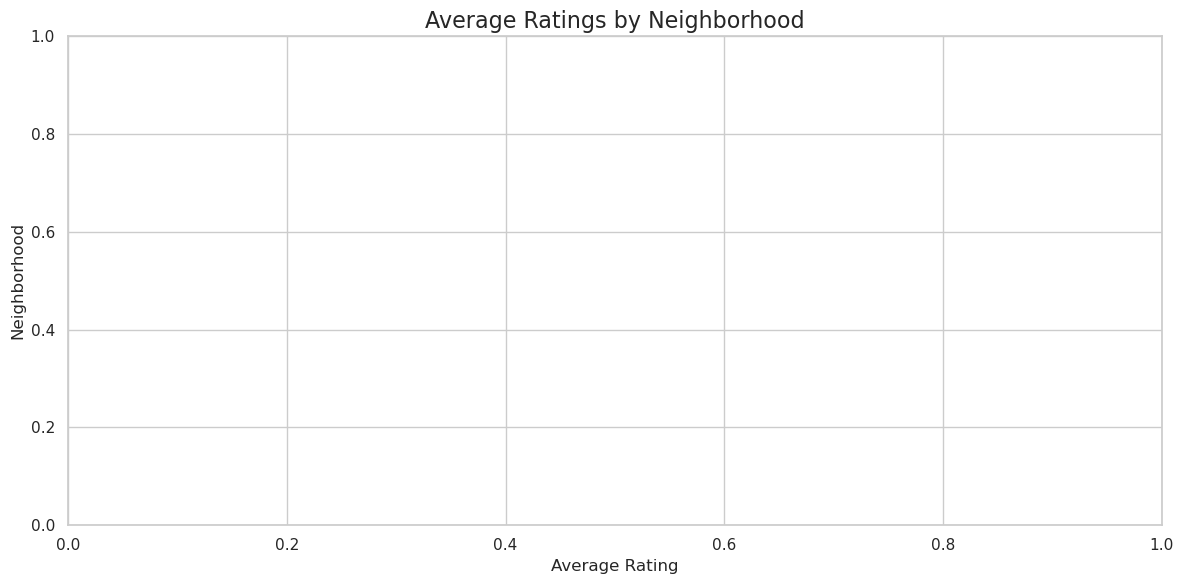

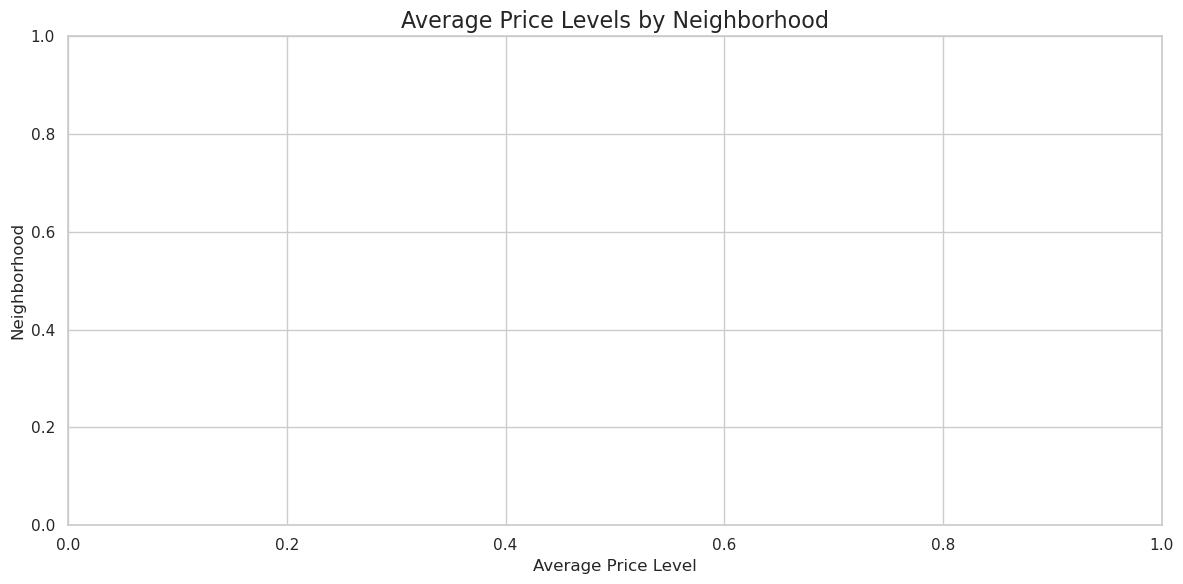

In [21]:
# Set style for the plots
sns.set(style="whitegrid")

# Plot Average Ratings by Neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_ratings, x='Average Rating', y='Neighbourhood', palette="viridis")
plt.title('Average Ratings by Neighborhood', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

# Plot Average Prices by Neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_prices, x='Average Price Level', y='Neighbourhood', palette="coolwarm")
plt.title('Average Price Levels by Neighborhood', fontsize=16)
plt.xlabel('Average Price Level', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# TESTING ANOTHER WAY OF EXTRACTING RATINGS AND PRICE (ADD POPULARITY LATER)

# Placeholder lists for ratings and prices
ra_list = []  # Average ratings for each neighborhood
pa_list = []  # Average prices for each neighborhood
rll = []      # All ratings per neighborhood
pll = []      # All prices per neighborhood

# Iterate over neighborhoods in the toronto_venues DataFrame
for neighborhood in toronto_venues['Neighbourhood'].unique():
    r_list = []  # Ratings for venues in this neighborhood
    p_list = []  # Prices for venues in this neighborhood

    # Filter venues in the current neighborhood
    neighborhood_venues = toronto_venues[toronto_venues['Neighbourhood'] == neighborhood]
    
    # Iterate over venues in the neighborhood
    for VENUE_ID in neighborhood_venues['fsq_id']:
        url = f'https://api.foursquare.com/v3/places/{VENUE_ID}'
        headers = {
            "Authorization": f"Bearer {API_KEY}"
        }
        
        # Make the API request
        response = requests.get(url, headers=headers)
        
        # Handle rate-limiting or errors
        if response.status_code == 429:
            print("Error: Request limit exceeded")
            break
        elif response.status_code != 200:
            print(f"Error: Failed to fetch details for VENUE_ID {VENUE_ID}")
            continue
        
        # Parse response JSON
        results = response.json()
        venue = results.get('response', {}).get('venue', {})
        
        # Extract rating and price tier if available
        if 'rating' in venue:
            r_list.append(venue['rating'])
        if 'price' in venue:
            p_list.append(venue['price']['tier'])
    
    # Calculate averages for the neighborhood
    if r_list:
        ra_list.append(statistics.mean(r_list))
        rll.append(r_list)
    if p_list:
        pa_list.append(statistics.mean(p_list))
        pll.append(p_list)

In [35]:
# Initialize lists for neighborhoods, ratings, and prices
neighborhoods = toronto_venues['Neighbourhood'].unique()
avg_ratings = []
avg_prices = []

# Ensure alignment of neighborhoods and their data
for neighborhood in neighborhoods:
    try:
        # Check if the neighborhood exists in the rating and price lists
        idx = toronto_venues['Neighbourhood'].unique().tolist().index(neighborhood)

        # If data exists for the neighborhood, append it
        avg_ratings.append(ra_list[idx] if idx < len(ra_list) else None)
        avg_prices.append(pa_list[idx] if idx < len(pa_list) else None)
    except ValueError:
        # Append None if no data is available
        avg_ratings.append(None)
        avg_prices.append(None)

# Create DataFrame with aligned data
results_df = pd.DataFrame({
    'Neighbourhood': neighborhoods,
    'Average Rating': avg_ratings,
    'Average Price Level': avg_prices
})

### Now it is your turn to discover interesting search results using Foursquare
You are expected to read through the API documentation and customize the searches.  